In [45]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pprint import pprint
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from sklearn.metrics import *
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Keras imports
import keras
from keras.datasets import mnist
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
# Graphical libraries
import seaborn as sns
# Set default figure size
plt.rcParams['figure.figsize'] = [30, 30]

In [2]:
# Read data
data = pd.read_csv ("bow-tie.csv")
# Drop x3 - it was erroneously added
data = data.drop(columns=['x3'])
data.head()

,Unnamed: 0,x1,x2,t
0,0,-20.00000,-22.837923,0.0
1,1,-19.95996,-30.545483,0.0
2,2,-19.91992,-23.318671,0.0
3,3,-19.87988,-22.799704,0.0
4,4,-19.83984,-31.876668,0.0


In [3]:
print('Shape: ', data.shape)
data.describe(include='all').transpose()

Shape:  (2000, 4)


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2000.0,4.995000e+02,288.747186,0.000000,249.750000,499.500000,749.250000,999.000000
x1,2000.0,-1.207923e-16,11.561449,-20.000000,-10.000000,0.000000,10.000000,20.000000
x2,2000.0,-3.858392e-01,20.587391,-51.902993,-15.819489,0.458157,16.014055,49.869455
t,2000.0,5.000000e-01,0.500125,0.000000,0.000000,0.500000,1.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
Unnamed: 0    2000 non-null int64
x1            2000 non-null float64
x2            2000 non-null float64
t             2000 non-null float64
dtypes: float64(3), int64(1)
memory usage: 62.6 KB


In [5]:
data.isna().sum()

Unnamed: 0    0
x1            0
x2            0
t             0
dtype: int64

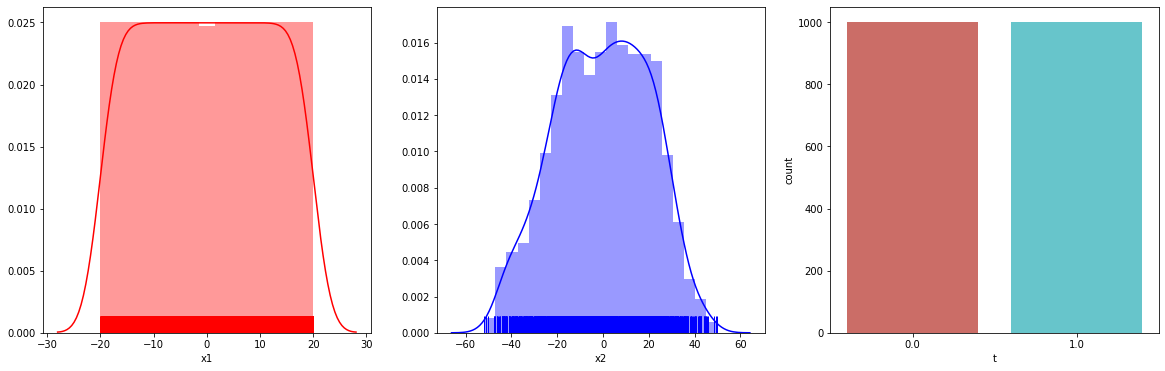

In [6]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.distplot(data['x1'], kde=True, rug=True, color='red');
plt.subplot(1,3,2)
sns.distplot(data['x2'], kde=True, rug=True, color='blue');
plt.subplot(1,3,3)
sns.countplot(data['t'], palette='hls')
plt.show()

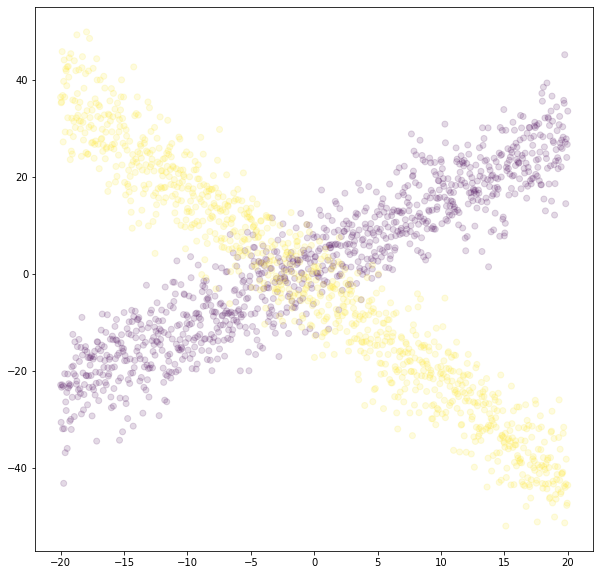

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(data['x1'], data['x2'], c=data['t'], alpha=0.15)

In [8]:
'''
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['x1'], data['x2'], data['x3'], c=data['t'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()
'''

"\nfig = plt.figure(figsize=(15,15))\nax = fig.add_subplot(111, projection='3d')\nax.scatter(data['x1'], data['x2'], data['x3'], c=data['t'])\nax.set_xlabel('X1')\nax.set_ylabel('X2')\nax.set_zlabel('X3')\nplt.show()\n"

In [9]:
# Let us standardize the training data
scaler = StandardScaler()
X = data[['x1', 'x2']]
X_scaled = pd.DataFrame(scaler.fit_transform(X))
y = data['t'].astype('category')
X.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
x1,2000.0,-1.207923e-16,11.561449,-20.000000,-10.000000,0.000000,10.000000,20.000000
x2,2000.0,-3.858392e-01,20.587391,-51.902993,-15.819489,0.458157,16.014055,49.869455


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=7)
X_train.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
0,1500.0,0.014491,1.001336,-1.730320,-0.864294,0.036373,0.872088,1.730320
1,1500.0,0.019102,1.003898,-2.461755,-0.732220,0.077669,0.828312,2.441682


In [11]:
X_test.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
0,500.0,-0.043474,0.996719,-1.723391,-0.874686,-0.098727,0.848705,1.726856
1,500.0,-0.057305,0.988006,-2.502990,-0.793818,-0.035663,0.728037,2.083580


In [12]:
# Logistic regression
logit = LogisticRegression()
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
# Use score method to get accuracy of model
score = logit.score(X_test, y_test)
print('Logit Score: ' + str(score))

Logit Score: 0.508


In [14]:
matrix = confusion_matrix (y_test, y_pred)
report = classification_report (y_test, y_pred)
print (matrix)
print (report)

[[117 131]
 [115 137]]
              precision    recall  f1-score   support

         0.0       0.50      0.47      0.49       248
         1.0       0.51      0.54      0.53       252

    accuracy                           0.51       500
   macro avg       0.51      0.51      0.51       500
weighted avg       0.51      0.51      0.51       500



In [48]:
# Let's compare many classifiers on the scaled data
names = ["Logistic Regression", "Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

In [49]:
X_train.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
0,1500.0,0.014491,1.001336,-1.730320,-0.864294,0.036373,0.872088,1.730320
1,1500.0,0.019102,1.003898,-2.461755,-0.732220,0.077669,0.828312,2.441682


In [50]:
X_train[1].head()

1201    1.000877
1561   -0.365772
1162    1.384459
1267    1.063513
266    -0.377191
Name: 1, dtype: float64

In [51]:
h = .01  # step size in the mesh
x_min, x_max = X_scaled[0].min(), X_scaled[0].max()
y_min, y_max = X_scaled[1].min(), X_scaled[1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
figure = plt.figure(figsize=(30, 30))

<Figure size 2160x2160 with 0 Axes>

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


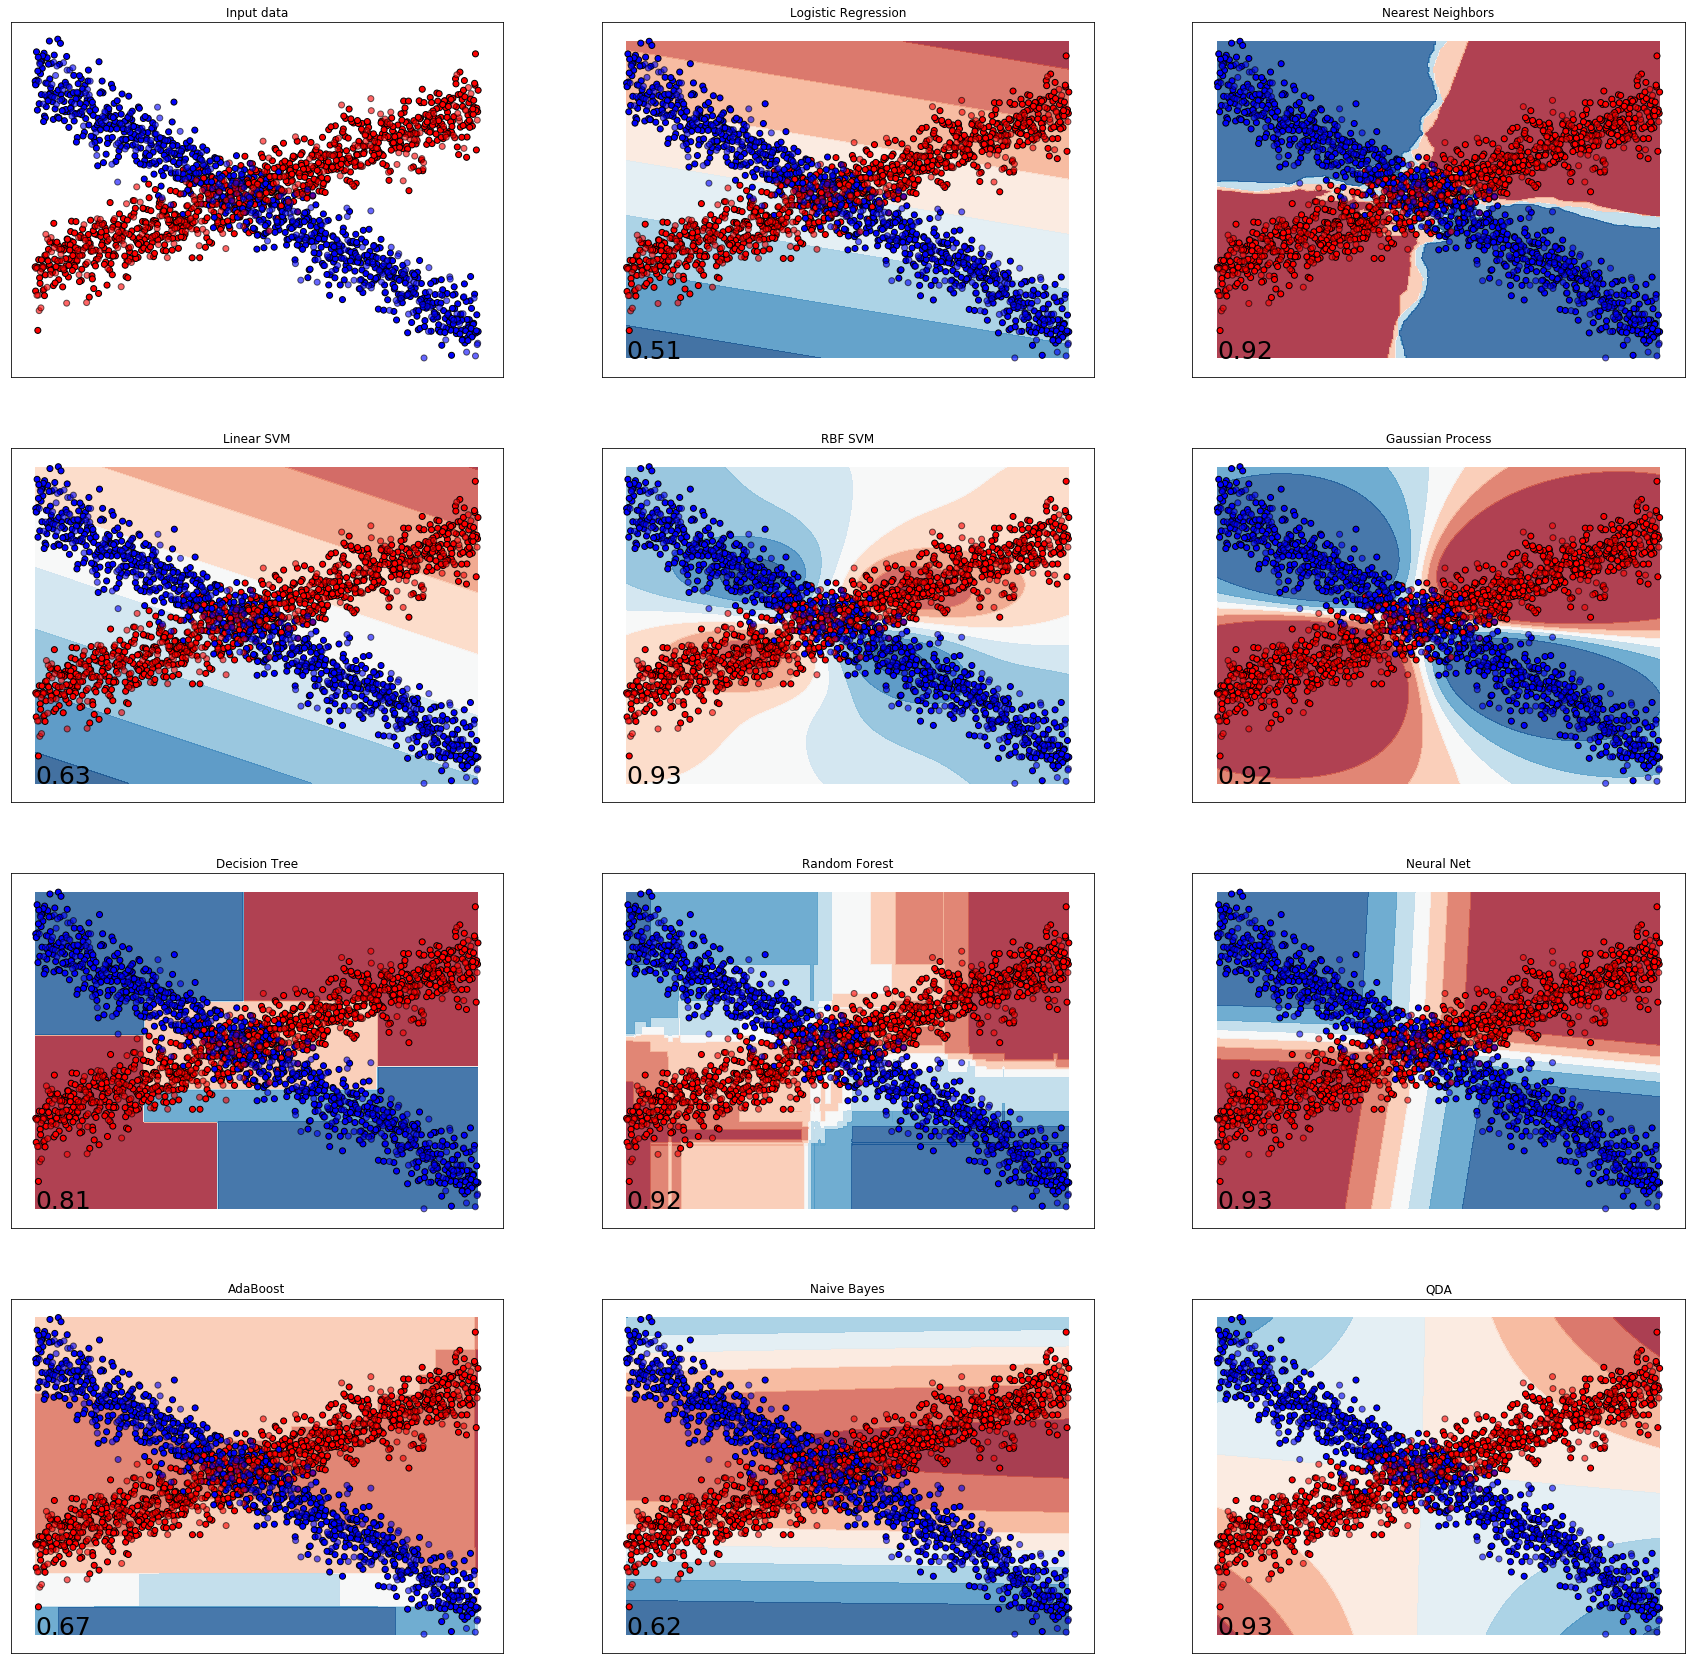

In [57]:
i = 1
total = len(classifiers) + 1
# iterate over classifiers
for name, clf in zip(names, classifiers):
    if i == 1:
        ax = plt.subplot(4, 3, i)
        ax.set_title("Input data")
        # Plot the training points
        ax.scatter(X_train[0], X_train[1], c=y_train, cmap=cm_bright, edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[0], X_test[1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
        #ax.set_xlim(xx.min(), xx.max())
        #ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1
    
    ax = plt.subplot(4, 3, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[0], X_train[1], c=y_train, cmap=cm_bright, edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[0], X_test[1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)
    #ax.set_xlim(xx.min(), xx.max())
    #ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(xx.min(), yy.min(), ('%.2f' % score), size=25, horizontalalignment='left')
    i += 1

#plt.tight_layout()
plt.show()

In [56]:
Z

array([[-100.37927795,  -99.67485451,  -98.97123475, ...,   94.5281345 ,
          94.95609   ,   95.38324182],
       [-100.03003524,  -99.32789246,  -98.62655337, ...,   94.09282889,
          94.51850373,   94.94337489],
       [ -99.68073514,  -98.98087302,  -98.2818146 , ...,   93.65758068,
          94.08097485,   94.50356534],
       ...,
       [  78.37982587,   77.96216276,   77.54369597, ..., -112.71053313,
        -113.40466417, -114.0995989 ],
       [  78.75730357,   78.3373598 ,   77.91661234, ..., -113.11760374,
        -113.81401545, -114.51123084],
       [  79.13483865,   78.71261422,   78.2895861 , ..., -113.52461697,
        -114.22330934, -114.92280539]])